# Importing libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [42]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Preprocessing

In [43]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [44]:
data.shape

(9994, 13)

In [45]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [47]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [48]:
data.duplicated().sum()

17

In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(9977, 13)

In [51]:
data.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9218,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Storage,44.688,7,0.2,3.3516
3552,Second Class,Home Office,United States,Chicago,Illinois,60653,Central,Technology,Phones,812.736,8,0.2,60.9552
5590,Second Class,Consumer,United States,San Francisco,California,94110,West,Office Supplies,Storage,352.380,2,0.0,81.0474
884,Standard Class,Consumer,United States,Rochester,New York,14609,East,Furniture,Furnishings,17.460,2,0.0,5.9364
9181,Standard Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Binders,31.128,3,0.2,11.6730


In [52]:
data.apply(lambda x: len(x.unique()))

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Handling outliers

# Check outliers for Sales column

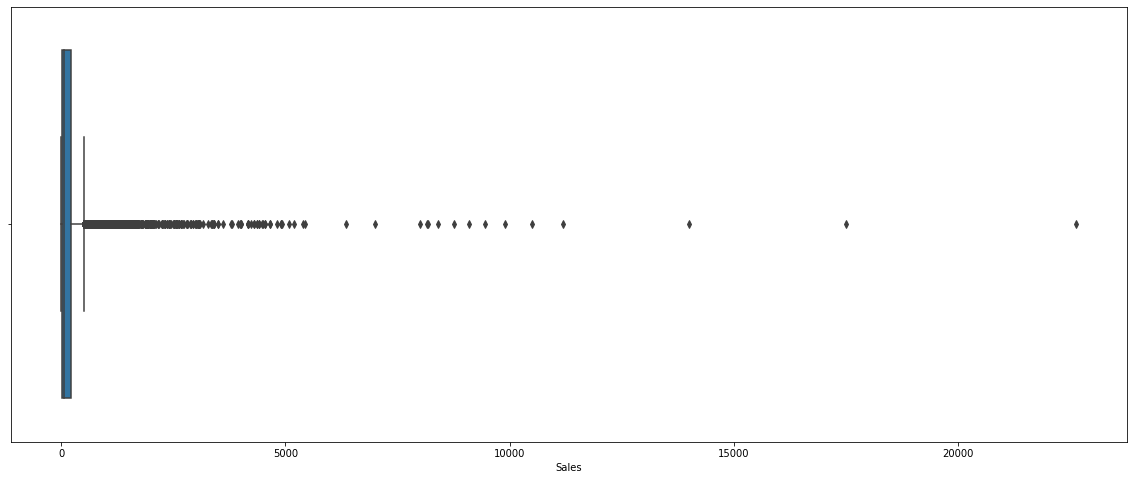

In [53]:
plt.figure(figsize=(20,8));
sns.boxplot(x=data['Sales']);

### <p>In such a distribution, removing all the outliers will lead to a biased distribution of data. Hence we would only remove the last 0.001 percent of the data.</p>


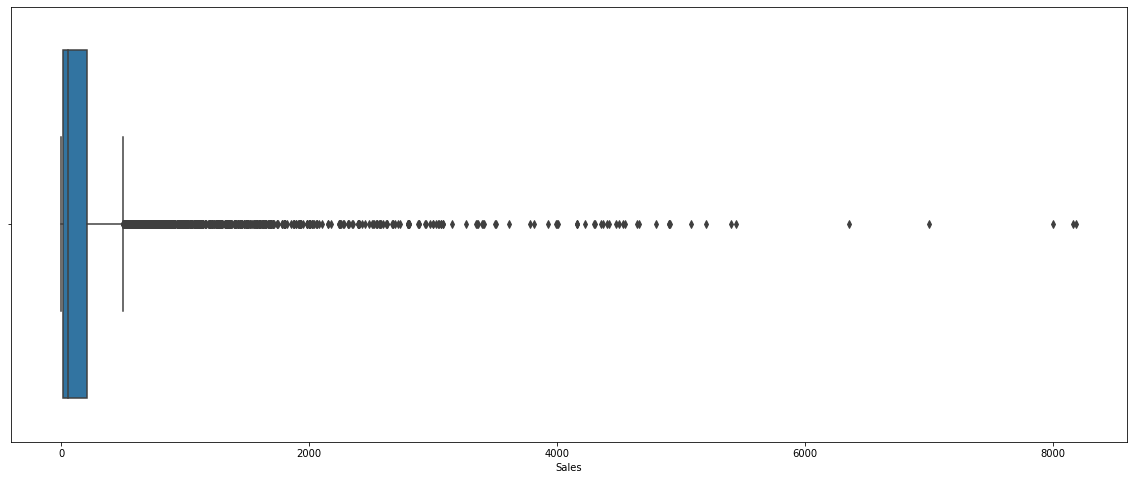

In [54]:
def RemoveOutliers(df, col, LowerQuantile,UpperQuantile):
  lower = df[col].quantile(LowerQuantile)
  upper = df[col].quantile(UpperQuantile)
  df_new = df.loc[(df[col]>lower) & (df[col]<upper)]
  return df_new

plt.figure(figsize=(20,8))
data = RemoveOutliers(data,'Sales',0,0.999)
sns.boxplot(x=data['Sales'])

# Check outliers for Profit column

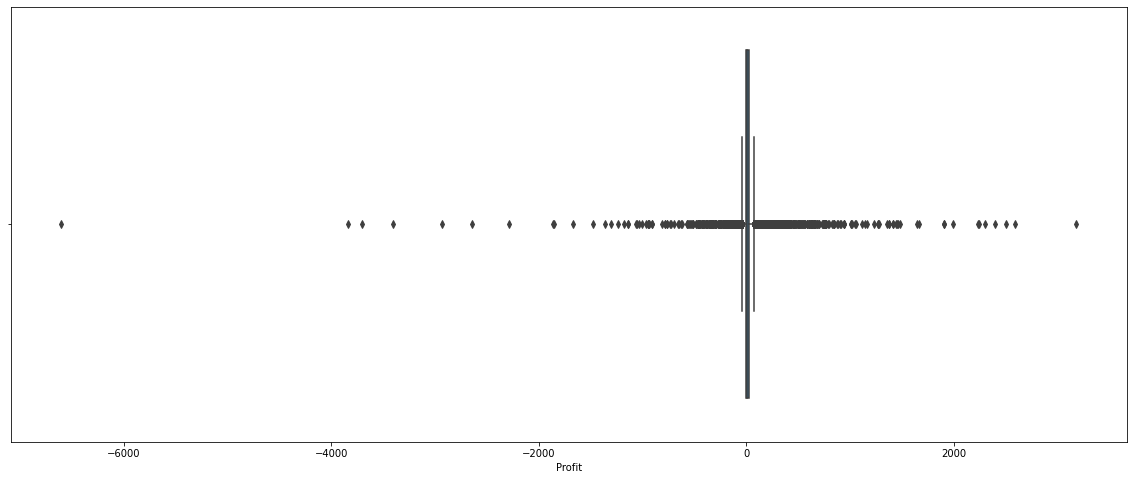

In [55]:
plt.figure(figsize=(20,8))
sns.boxplot(x=data['Profit'])

# <p>Here we will remove 0.002% oultiers from both the ends</p>

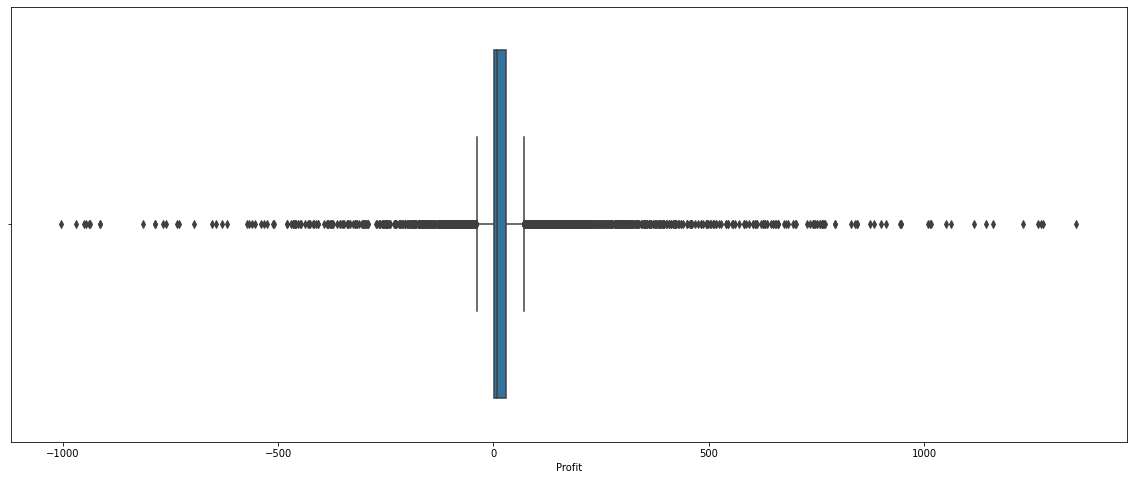

In [56]:
data = RemoveOutliers(data, 'Profit', 0.002, 0.998 )
plt.figure(figsize=(20,8))
sns.boxplot(x=data['Profit'])

# Exploratory Data Analysis
 

#### In this section, we will perform EDA on our dataset, with an aim to uncover the hidden trends within the data which might help the superstore to increase their profit.

# Plotting Geo-plots

### <p>We will map the state code as we will be working with maps</p>

In [57]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
3937,Standard Class,Consumer,United States,Grand Prairie,Texas,75051,Central,Office Supplies,Paper,27.216,3,0.2,9.8658,TX
6411,First Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Paper,76.864,2,0.2,26.9024,TX
1858,First Class,Corporate,United States,Bristol,Connecticut,6010,East,Office Supplies,Appliances,137.620,2,0.0,60.5528,CT
5142,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Supplies,63.840,8,0.0,18.5136,NY
1433,Second Class,Consumer,United States,Florence,Alabama,35630,South,Furniture,Chairs,1819.860,14,0.0,163.7874,AL
204,Standard Class,Corporate,United States,Franklin,Tennessee,37064,South,Furniture,Furnishings,35.168,7,0.2,9.6712,TN
2326,Second Class,Corporate,United States,New York City,New York,10035,East,Furniture,Bookcases,46.384,1,0.2,1.1596,NY
1241,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Phones,22.000,4,0.0,5.5000,NY
2435,First Class,Corporate,United States,Springfield,Virginia,22153,South,Office Supplies,Appliances,826.110,3,0.0,322.1829,VA
1203,Standard Class,Corporate,United States,Denver,Colorado,80219,West,Office Supplies,Storage,593.568,2,0.2,0.0000,CO


# Sales per state <p>The <b>total sales per state</b> and the revenue generated is shown below:</p>

In [58]:
state_info = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

fig = go.Figure(data=go.Choropleth(
    locations=state_info.index, 
    z = state_info.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

<p>The obeseravtions from the above map are as follows:</p>

1.   The company having the highest sales is in California and is colored in maroon having sales of 350k US million dollars. 
2.   Next, we have a company in New York colored in orange with the second highest scale of aroung 200k US million dollars.
3. Then we have a company in Texas colored in light orange having third highest sales of around 150k US million dollars.
4.  We can also conclude that the sales on the West Coast is greater than the sales on the East Coast.



# Sales per profit
<p>A geographical plot of profit generated by each state of USA</p>

In [59]:
fig = go.Figure(data = go.Choropleth(
    locations = state_info.index,
    z = state_info.Profit,
    locationmode = 'USA-states',
    colorscale='YlGnBu',
    colorbar_title = 'Profits in USA'
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope = 'usa'
)

<p>The obeservation from the above geographical <b>profit/loss plot</b> are:</p>

1.   A company in California has the maximum profit of approximately 75k US million dollars and is colored in navy blue.
2.   The second position is claimed by New York in the east making a profit of approximately 55k US million dollars.
3. There are more number of states with a loss in East as compared to the West.
4. Pennslyvania is making the highest loss of 13k US million dollars.
5. There are approximately 7 states which are having loss. 



# Correlation Matrix

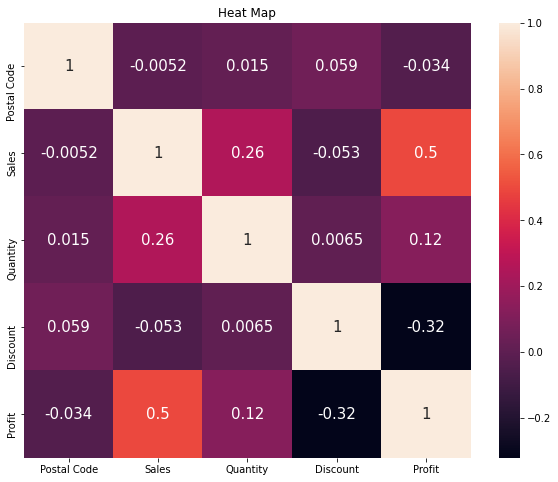

In [60]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, annot_kws={'size':15})
plt.title("Heat Map")
plt.show()

In [61]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.005237,0.014671,0.058541,-0.033775
Sales,-0.005237,1.000000,0.256056,-0.052577,0.496927
Quantity,0.014671,0.256056,1.000000,0.006516,0.123656
Discount,0.058541,-0.052577,0.006516,1.000000,-0.322047
Profit,-0.033775,0.496927,0.123656,-0.322047,1.000000


# Bar plots

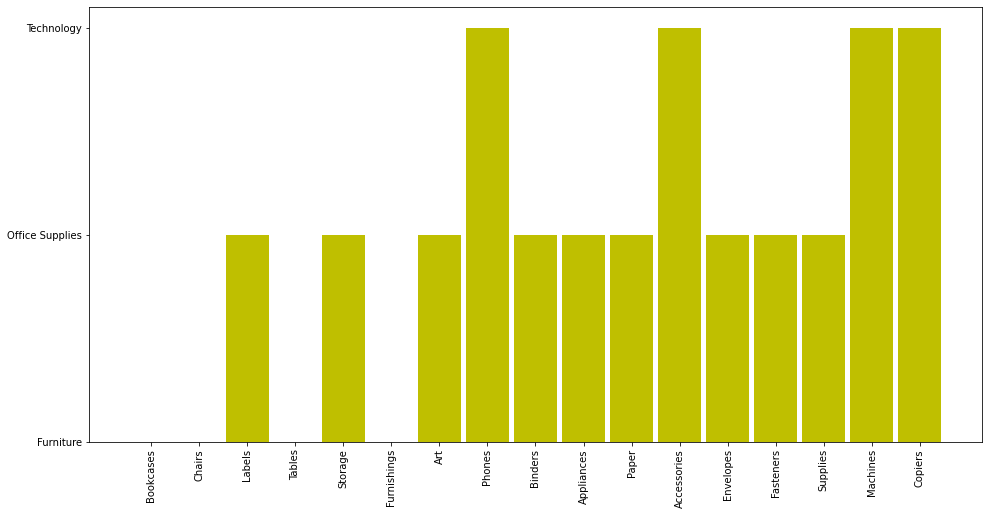

In [62]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data= data, color='y', width=0.9)
plt.xticks(rotation=90)
plt.show()

<p>From this we can clearly vizualize which category and sub-category to choose when one is looking up for a product.</p>
<p><b>Furniture includes:</b></p>

*   Bookcases
*   Chairs
* Tables
* Furnishings

<p><b>Office Supplies include:</b></p>


*   Labels
*   Storage
*   Art
*   Binders
*   Appliances
*   Paper
*   Envelopes
*   Fastners
*   Supplies

<p><b>Technology includes:</b></p>


*   Machines
*   Copiers
*   Accessories
*   Phone

# Pie chart
<p>According to sub-category</p>

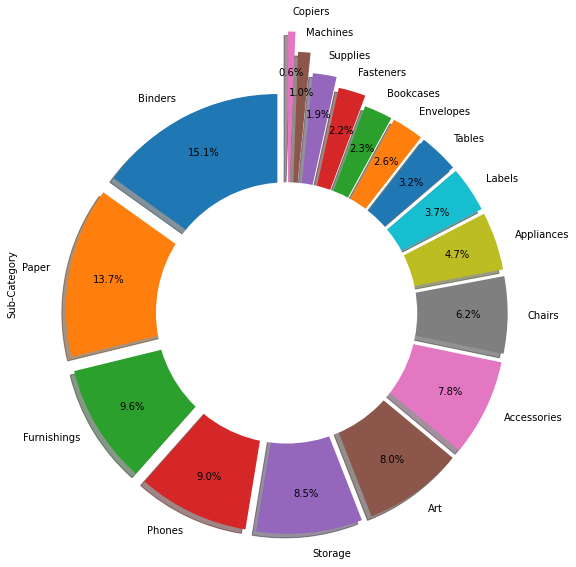

In [63]:
plt.figure(figsize=(8,8))
data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,  shadow=True,pctdistance=0.8, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.2,0.3,0.4])
circle = plt.Circle((0,0), 0.65, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

<p>The store has a variety of office supplies which mostly consists of binders and paper.</p>

# Count plot


#### With respect to different states

California              1995
New York                1118
Texas                    975
Pennsylvania             583
Washington               500
Illinois                 489
Ohio                     466
Florida                  381
Michigan                 251
North Carolina           246
Arizona                  224
Virginia                 223
Georgia                  182
Colorado                 181
Tennessee                181
Indiana                  148
Kentucky                 138
Massachusetts            135
New Jersey               129
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  95
Minnesota                 88
Connecticut               82
Oklahoma                  66
Missouri                  65
Alabama                   60
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nebraska      

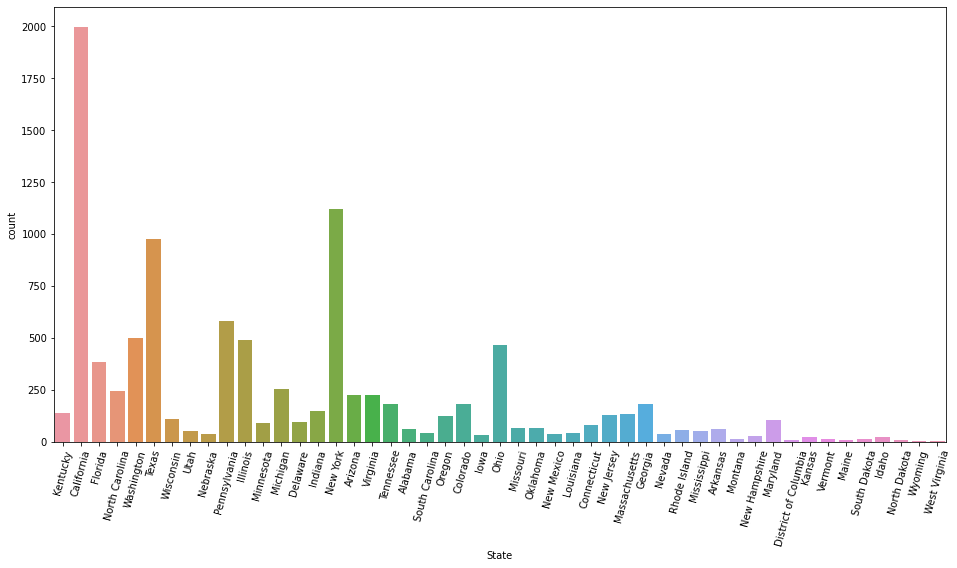

In [64]:
print(data['State'].value_counts())
plt.figure(figsize=(16,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=75 )
plt.show()

### With respect to different sub-category

Binders        1502
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      464
Labels          363
Tables          318
Envelopes       254
Bookcases       227
Fasteners       217
Supplies        189
Machines         99
Copiers          58
Name: Sub-Category, dtype: int64


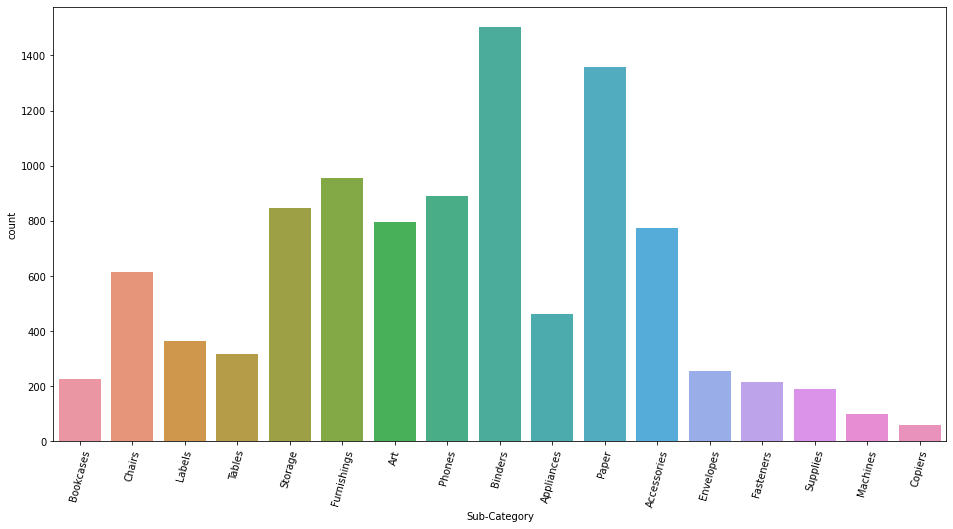

In [65]:
print(data['Sub-Category'].value_counts());
plt.figure(figsize=(16,8))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=75)
plt.show()

#### With respect to category

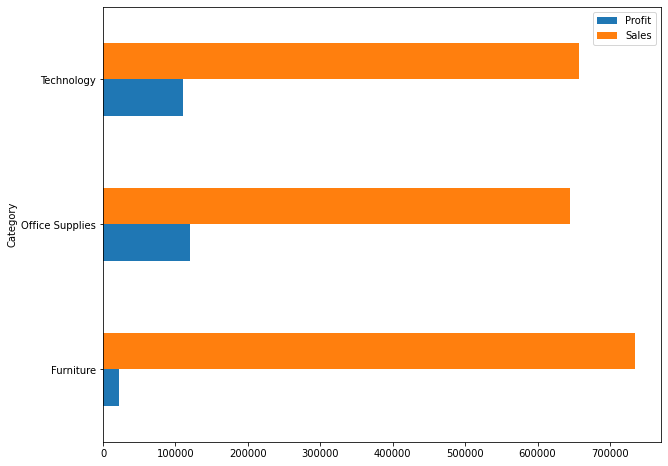

In [66]:
data.groupby('Category')['Profit','Sales'].agg('sum').plot.barh(figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

<p>From the above graphah, we can infer that:</p>


*   Though furniture has the highest sales, it has received the least profit. 

*   Office Supplies and Technology both have similar ranges of Sales and Profit respectively.


# With respect to sub-category

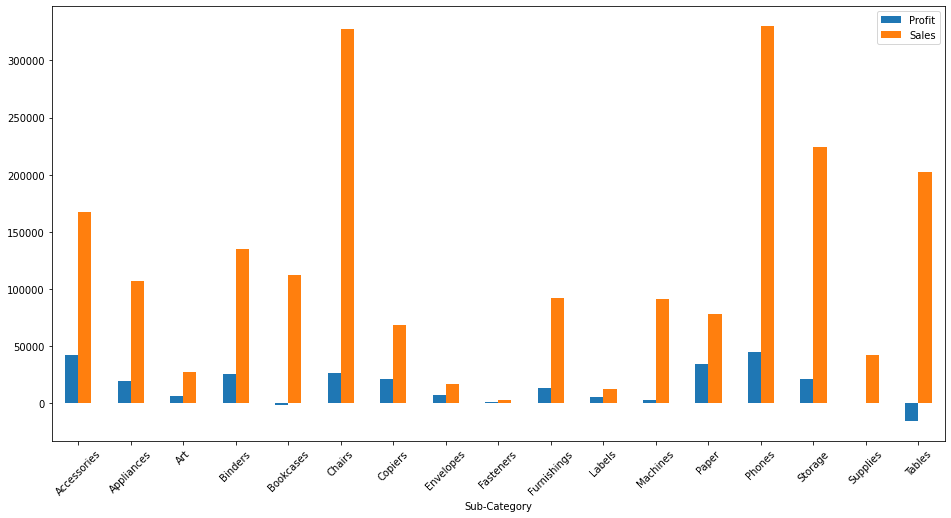

In [67]:
data.groupby('Sub-Category')['Profit','Sales'].agg('sum').plot.bar(figsize=(16,8))
plt.xticks(rotation=45)
plt.show()

<p>From the above graph, we can infer that:</p>

*   Phones and chairs have the highest number of sales.
*   Supplies and Bookcases are in loss.
*  The ratio of sales to profit is good for Copiers and Paper.

# Profit with respect to Sub-Category

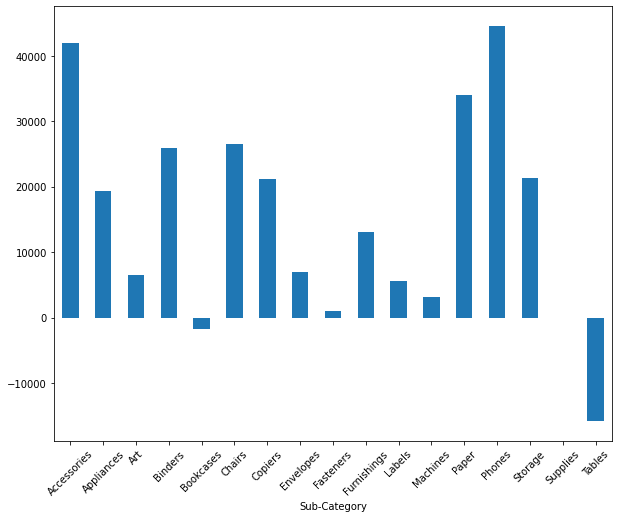

In [68]:
data.groupby('Sub-Category')['Profit'].agg('sum').plot.bar(figsize=(10,8))
plt.xticks(rotation=45)
plt.show()

# Profit to sales Ratio:
<p>We will find the profit to sales ratio for each state. The profit to sales ratio tells how much a store sells to make profit.

*   Higher the profit to sales ratio, better is the profit of that particular store.
* A lower profit to sales ratio for two states having the same profit and different sales indicates that the store with lower ratio has to increase their sales in order to match other ratios.
*   Negative ratio indicates that there is loss.




In [69]:
state_info

,Sales,Profit
state_code,,
AL,16470.6400,4327.6253
AR,11678.1300,4008.6871
AZ,35282.0010,-3427.9246
CA,452492.3115,74424.3041
CO,29558.1330,-3127.8779
CT,13384.3570,3511.4918
DE,16951.0990,4937.3892
FL,65489.7430,-556.6848
GA,39740.9400,11632.5923


In [70]:
state_info['profit_to_sales'] = state_info['Profit'] /state_info['Sales']

#adding state name
state_name = {v:k for k, v in state_code.items()}
state_info['States'] = state_info.index
state_info['States'] = state_info.States.apply(lambda x: state_name[x])

state_info = state_info.sort_values(by = ['profit_to_sales'])

state_info

,Sales,Profit,profit_to_sales,States
state_code,,,,
PA,100349.2200,-13971.0075,-0.139224,Pennsylvania
TN,27449.2330,-3038.4754,-0.110694,Tennessee
IL,77509.9530,-8528.2745,-0.110028,Illinois
OH,71676.7850,-7719.3486,-0.107697,Ohio
CO,29558.1330,-3127.8779,-0.105821,Colorado
AZ,35282.0010,-3427.9246,-0.097158,Arizona
TX,155051.3638,-12746.4742,-0.082208,Texas
OR,17420.7820,-1194.0993,-0.068545,Oregon
NC,41672.3520,-482.0590,-0.011568,North Carolina


<p><b>From the above data we can see that there are a few weak areas which have negative profit to sales ratio.</b></p>

<p>Let us analyze a few states from each of the following category(Low profit, medium profit, high profit, low loss and high loss)</p>

In [71]:
def state_data_viewer(states):
  product_info = data.groupby(['State'])
  for state in states:
    df = product_info.get_group(state).groupby(['Category'])
    fig, ax = plt.subplots(1,3, figsize=(28,5))
    fig.suptitle(state, fontsize=19)
    ax_index = 0
    for cat in ['Furniture','Office Supplies','Technology']:
      cat_dat = df.get_group(cat).groupby(['Sub-Category']).sum()
      sns.barplot(x=cat_dat.Profit, y=cat_dat.index, ax=ax[ax_index])
      ax[ax_index].set_ylabel(cat)
      ax_index+=1
    fig.show()

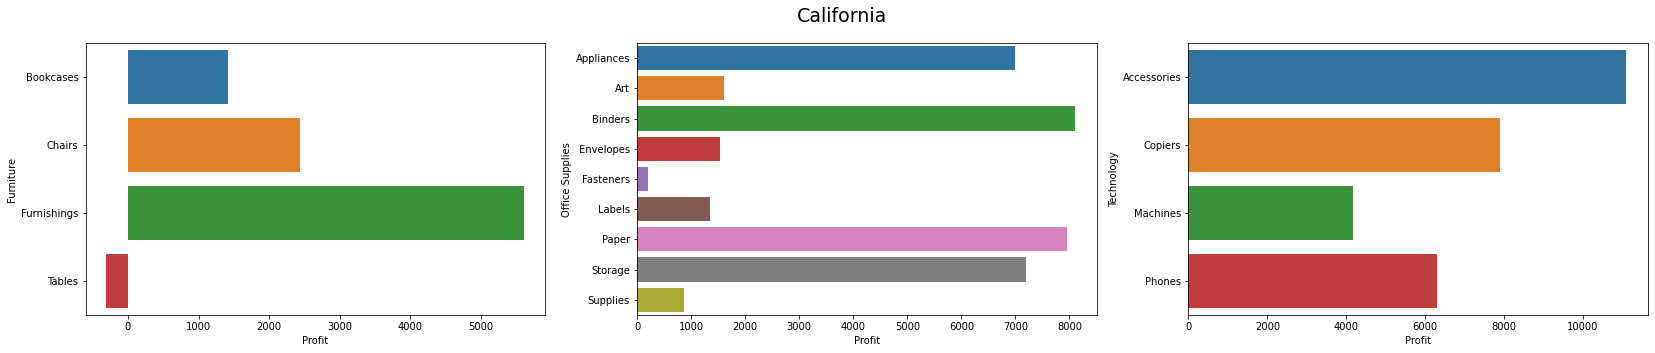

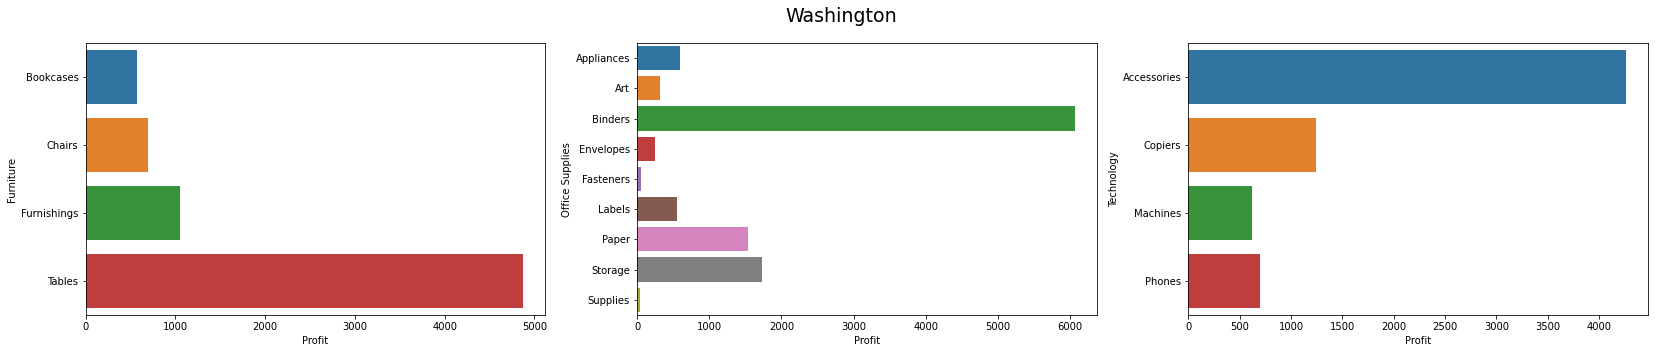

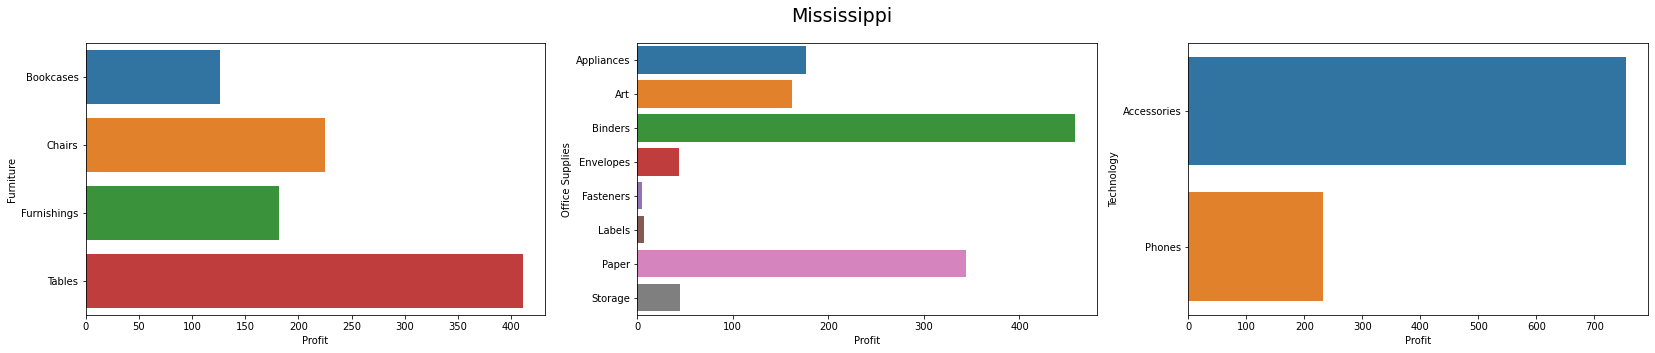

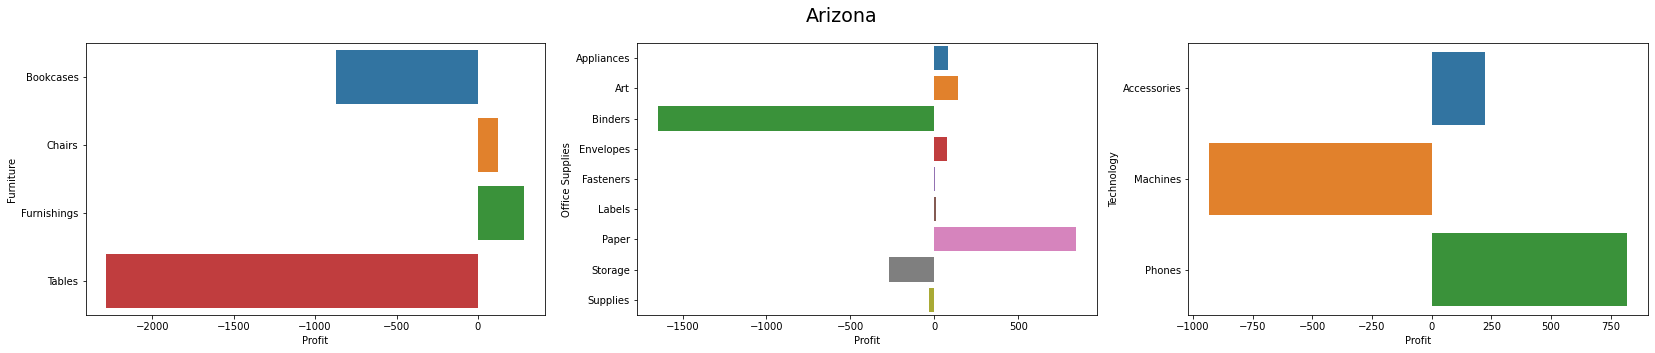

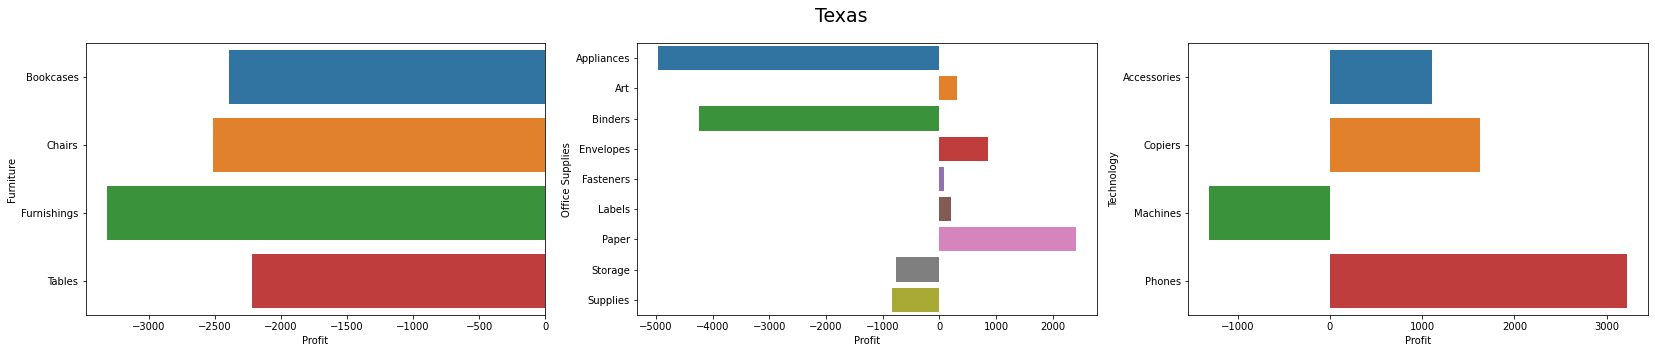

In [72]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

**Observations made from the above graph are:**
*  California, a state which is generating the highest revenue, which is having profit in all the products that are being sold except for table in furniture category which has seen an overall loss. This data has been observed for other states also and thus we can conclude that people do not prefer to purchase tables from supermarket.
*  Next we have is Washington. It has generated profit for each and every Sub-Category which leads to a good performance. Some of the Sub-Category have less generated less Profit which are Fasteners, Supplies and Envelopes.
*  Mississippi generated low overall profit. The sub-category Technology performs the worst.
*  Arizona has seen an low loss on it's total revenue, having loss for various sub-categories such as binders, machines, tables, book shelves and storage.
* Texas being the state with the highest revenue generation has seen an overall high loss. The main category leading to this loss is furnishing in which there is loss in each and every sub-category, followed by Office Supplies which have seen major loss in Appliances and Binders, and minor loss in Storage and Supplies. Technology has also seen a moderate loss in the sub-category Machines.

# Waffle charts

In [73]:
!pip install pywaffle --quiet
from pywaffle import Waffle

In [102]:
df = data[['Segment', 'Sales']].groupby(['Segment']).sum()
print(df)
fig = plt.figure(
    FigureClass = Waffle,
    figsize = (10,10),
    rows =10,
    values = df.to_numpy()/10000,
    labels = ["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(df.index), (df.Sales/df.Sales.sum()*100).to_numpy())],
    title = {'label':'Sales in Each Customer Segment(Total = $2.29 million)'.upper(), 'loc':'center'},
    legend = {'loc': 'lower_left','bbox_to_anchor':(0.8,-0.1), 'ncol': len(df), 'framealpha':0.9}
)

                    Sales
Segment                  
Consumer     1.030086e+06
Corporate    6.436562e+05
Home Office  3.620080e+05


TypeError: ignored

<p><b>From the above waffle chart we can conclude the following points:</b></p>

*  Around 50% of the sales is done in the cusomer section which consists of individual buyers.
*  30% of the sales is done in corporate section.
*  18% of the sales is done for Home Office use.


<p>Let's analyze profit produced by each customer segment</p>  

In [ ]:
df = data[['Segment','Profit']].groupby(['Segment']).sum()

fig = plt.figure(
    FigureClass = Waffle,
    figsize = (8,8),
    rows = 6,
    values = df.to_numpy()/4000,
    title={'label': 'Profits made by Each Customer Segment(Total = $286K)'.upper(),'loc':'center'},
    labels = ["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(df.index), (df.Profit/df.Profit.sum()*100).to_numpy())],
     legend = {'loc': 'lower_left','bbox_to_anchor':(0.9,-0.1), 'ncol': len(df), 'framealpha':0.9}
)

<p><b>From the above waffle chart, we can observe that:</b></p>

* Though consumer section is generating sales of approximately 50% but is unable to produce an equivalent amount of profit. It is producing only 48% percent profit, from which we can say that the major loss component comes from Consumer segment.
*  Corporate and Home Office segment both combined have an overall profit of 50% percent and both individually have shown profit when compared to their sales.

<p>Here, the company can do two things in order to increase their profits. They can look into the reasons why they are bearing more losses in the consumer segment and try to reduce those losses, thus directly increasing the sales.</p>

<p>Other route can be this, the company can take is to providing more polished services to the Corporate and Home Office segments, thus driving them towards more profits.</p>

###**Now, let us observe the prices of products across each product category and try to see how the prices are spread across each product category.**

In [75]:
import plotly.express as px

In [76]:
#Creating new rows
data['price_per_product'] = data.Sales/data.Quantity
data['profit_per_product'] = data.Profit/data.Quantity

df = data.groupby(['Category'])
for cat, d in df:
  sizes = np.absolute(d.price_per_product)
  fig = px.scatter(d, x='price_per_product', title=cat.upper(),
                   color='Sub-Category', size = sizes, 
                   hover_data=['Sub-Category'])
  fig.update_layout(
      height = 600,
      xaxis = dict(title = 'Price Per Product'),
      yaxis = dict(title = '')
  )
  fig.show()


<p><b>The analysis of above scatter plot is as follows:</b></p>

1. Furniture

      *  Most expensive furntiture item is bookcase having a selling price of $880. 
      *  Average price of furnishings is around $150.
      * Average price range for tables and chairs is $200. Maximun price for tables can range upto $550  and maximum price range for chairs can range upto $700.
2. Office Supplies

    * Most office supply is under $100.
    * Supplies are the most expensive followed by binders.
3. Technology
    *  Most technology product are under $700.
    *  Machines range up to the highest price which is $2400.
    * It is the most expensive category.

# BAR PLOTS

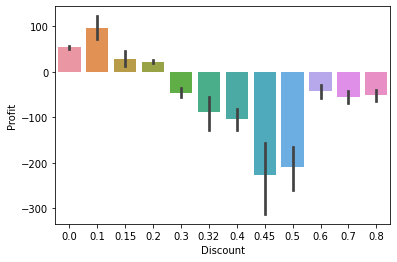

In [77]:
sns.barplot(x=data.Discount, y=data.Profit )

<p><b>We can observe the following points:</b></p>

* When profit increase more than 20% then the profit converts into loss.

<p>Now that we have seen the distribution of products across various price brackets, let us have a look at how much each product generates or loses in terms of revenue.</p>

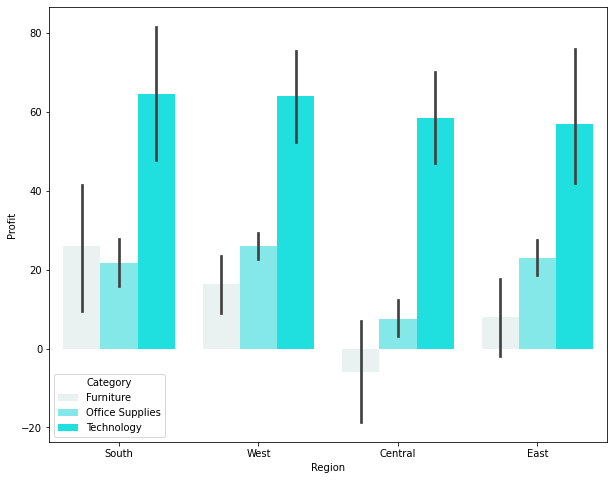

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(x=data.Region, y=data.Profit, hue=data.Category, color='Cyan')

<p>According to the above graph, we can observe that:</p>

*   Technology has highest profit in all 4 regions.
*   Office supplies have average profit in all 4 regions.
*  Central region has seen Furniture in loss.



Text(0.5, 1.0, 'Sales and Profit Margin with respect to State')

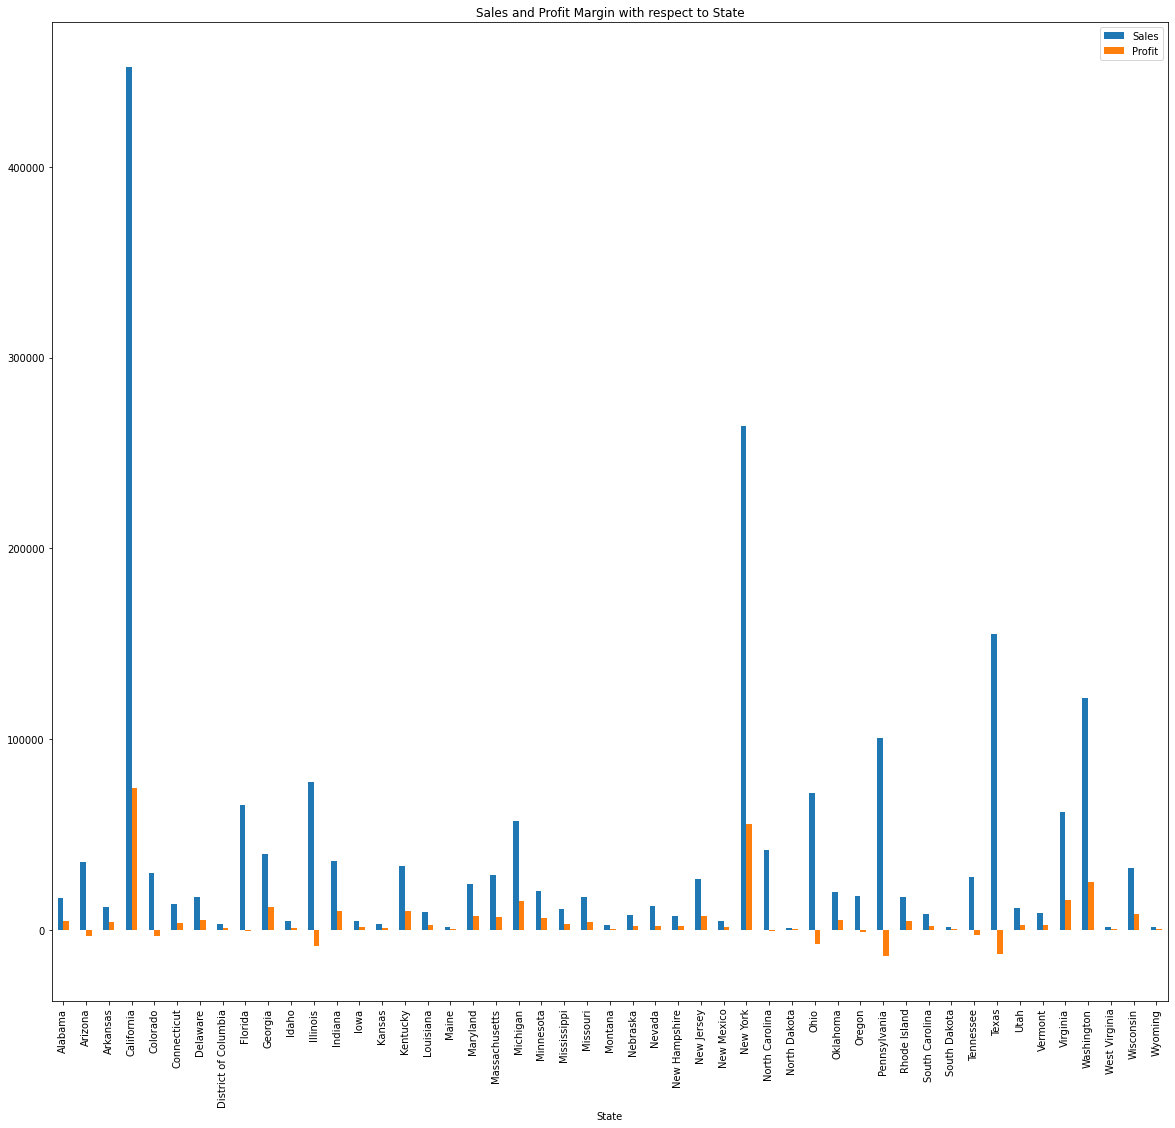

In [79]:
df = data.groupby(['State'])['Sales', 'Profit'].sum()
df.plot.bar(figsize=(20,18))
plt.title('Sales and Profit Margin with respect to State')

# According to shipping mode
<p>Let us look that what various shipping modes play in all this.</p>

<p>Let us have a look at which shipping method different consumer segments use the most for buying products in different product categories.</p>

In [80]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [81]:
data['Ship Mode'].value_counts()

Standard Class    5922
Second Class      1936
First Class       1529
Same Day           539
Name: Ship Mode, dtype: int64

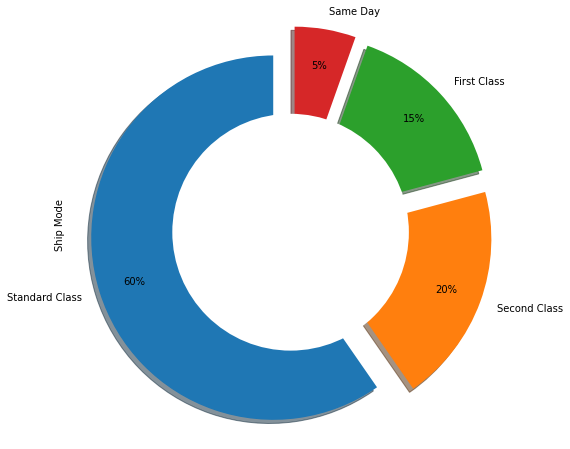

In [82]:
#plotting donut chart
data['Ship Mode'].value_counts().plot.pie(autopct='%0.f%%', figsize=(8,8), shadow = True, startangle=90, pctdistance=0.80, explode=(0.1,0.11,0.12,0.13))
circle = plt.Circle((0,0), 0.65, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.show()

In [83]:
data['Category'].value_counts()

Office Supplies    5989
Furniture          2116
Technology         1821
Name: Category, dtype: int64

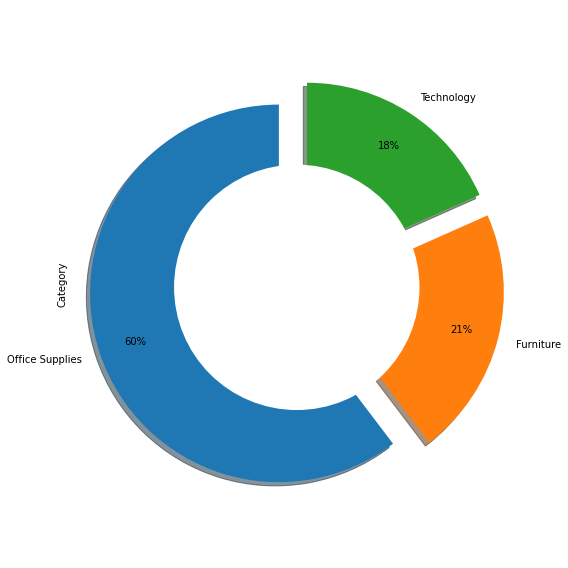

In [84]:
data['Category'].value_counts().plot.pie(autopct="%0.f%%", figsize=(8,8), shadow=True, startangle=90, pctdistance=0.8, explode=(0.10,0.10,0.10))
circle = plt.Circle((0,0), 0.65, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

# According to the number of deliveries
<p>Let's plot the number of deliveries in each Category for each Segment</p>

In [85]:
ship_segment = data.groupby(['Segment'])
segment_list = data.Segment.value_counts().index
category_list = data.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in category_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = category_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'))
    fig.add_trace(go.Bar(x = category_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'))
    fig.add_trace(go.Bar(x = category_list,y = first,name='First Class',marker_color='rgb(250,127,78)'))
    fig.add_trace(go.Bar(x = category_list,y = same,name='Same Day',marker_color='lightsalmon'))

    fig.update_layout(
        barmode ='group',
        width = 800,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()


<p><b>From the above graph we can observe that:</b></p>

*  Standard class shipping is the most common mode of shipping irrespective of the Category and customer segments.
*  Office supplies are most bought goods and Technology are least bought.

In [86]:
data['loss'] = data.Profit.apply(lambda x: x if(x<0) else 0)

fig = px.bar(data, x='Ship Mode', y='loss', title = 'Losses in Each Shipping Mode'.upper(), 
             color='Ship Mode', hover_data=['loss','Sub-Category'])

fig.update_layout(
    autosize = True,
    width = 800,
    yaxis = dict(title='Total Loss'),
    xaxis = dict(title='Shipping Class')
)

fig.show()

<p><b>Observations from the above plot are:</b></p>

*  The highest loss beared by the company was while delivering products via the standard class shipping. However, one important thing to be noted is that some of the biggest losses beared by the superstore also fall under the standard shipping category, one going as high as USD 6,600 in a single sale.
*  First and second class shipping have almost equal losses as the number of sales shipped under each shipping category were also almost equal.

# Effect of discount on revenue and sales
<p>We will see how discounts affect the sale of products and the revenue generated by it.</p>

In [87]:
from plotly.subplots import make_subplots

In [88]:
data['whether_discount'] = data.Discount.apply(lambda x:'No Discount' if(x==0) else 'Discount')

discount_data = data.groupby(['whether_discount']).mean()

#generating a function which will plot the variation of effects of discount on sale of products and revenue generated by it
def discount_plotter(data_type = 'total'):
  color = ['rgb(81,81,246)','rgb(209,70,70)']
  if data_type == 'average':
    dicount_data = data.groupby(['whether_discount']).mean()
    fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
  else:
    discount_daya = data.groupby(['whether_discount']).mean()
    fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
  
  fig.add_trace(go.Bar(x=discount_data.index, y=discount_data.Sales, marker_color = color), row=1, col=1)
  fig.add_trace(go.Bar(x=discount_data.index, y=discount_data.Profit, marker_color = color), row=1, col=2)
  fig.add_trace(go.Bar(x=discount_data.index, y=discount_data.price_per_product, marker_color = color), row=1, col=3)

  fig.update_layout(showlegend=False)
  fig.show()

discount_plotter('average')
discount_plotter()

<p><b>Observations from the above given plots:</p></b>

*  Considering both average and total sales, it seems that people tend to buy more things when it is selling at a discounted price. An average sale at discounted price is of around USD 232 as compared to USD 226 on undiscounted price.

* On an average, a discounted sale results in a loss of around USD 6 as compared to around USD 66 in profit on a non-discounted sale. Also, the company made a total profit of around USD 320K on non-discount sales, as compared to a loss of around USD 34K on discounted sales.

* The average price of a discounted product is around USD 62, while the same is around USD 58 for a non-discounted item.

<p>Moreover,while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.</p>

# After EDA our dataset looks like the following:

In [89]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code,price_per_product,profit_per_product,loss,whether_discount
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY,130.9800,20.9568,0.000,No Discount
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY,243.9800,73.1940,0.000,No Discount
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA,7.3100,3.4357,0.000,No Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL,191.5155,-76.6062,-383.031,Discount
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL,11.1840,1.2582,0.000,Discount
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,CA,6.9800,2.0242,0.000,No Discount
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,CA,1.8200,0.4914,0.000,No Discount
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,CA,151.1920,15.1192,0.000,Discount
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,CA,6.1680,1.9275,0.000,Discount
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,CA,22.9800,6.8940,0.000,No Discount


We can now apply any machine learning model on it.

# YASH SINGH